In [12]:
import pandas as pd # Leer el Excel
import networkx as nx # Crea el grafo
import matplotlib.pyplot as pt # Dibuja el grafo
from google.colab import drive # Leer archivo desde Drive
import math # Funciones matemáticas adicionales

In [13]:
# Conectar con Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Carga el excel del Drive
excel = pd.read_excel(io="/content/drive/MyDrive/Complejidad_Algoritmica/CoberturaMovil_v2.xlsx", sheet_name="Hoja 1")

excel.shape

(1500, 10)

In [15]:
# Crear un grafo
G = nx.Graph()

In [16]:
# Ordena los datos por latitud y longitud para organizar los nodos de manera geografica
excel_sorted = excel.sort_values(by=['LATITUD', 'LONGITUD'], ascending=[False, True])

In [17]:
# Recorremos cada fila del Excel
for idx, row in excel_sorted.iterrows():
    nombre = row['CENTRO_POBLADO']
    latitud = row['LATITUD']
    longitud = row['LONGITUD']

    # nombre: Identificador del nodo
    # lat, lon y emp: Son atributos del nodo
    G.add_node(
      nombre,
      lat = latitud,
      lon = longitud
      )

In [18]:
# Distancia entre dos puntos
def distancia_km(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la tierra en km

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    return R * c

In [19]:
# Recorremos cada nodo del grafo
for n1 in G.nodes():

    # Para cada nodo n1, comparamos con todos los demás nodos n2
    for n2 in G.nodes():

        if n1 != n2:
          lat1 = G.nodes[n1]['lat']
          lon1 = G.nodes[n1]['lon']
          lat2 = G.nodes[n2]['lat']
          lon2 = G.nodes[n2]['lon']

          d = distancia_km(lat1, lon1, lat2, lon2)

          # Se unen, si la distancia es menor a 5 km
          if d < 5:
            G.add_edge(n1, n2)

In [20]:
# Conexiones extras para completar el grafo
G.add_edge('CHACLACAYO', 'CIENEGUILLA')
G.add_edge('CHACLACAYO', 'SAN FRANCISCO')
G.add_edge('CHACLACAYO', 'CHOSICA')
G.add_edge('CHACLLA', 'SHIMAY')
G.add_edge('CHACLLA', 'ARAHUAY')
G.add_edge('VICAS', 'ARAHUAY')
G.add_edge('VICAS', 'LARAOS')
G.add_edge('MARCO', 'HUAMANTANGA')
G.add_edge('ACOS', 'SAN AGUSTIN DE HUAYOPAMPA')
G.add_edge('ACOS', 'SAN PEDRO DE HUAROQUIN')
G.add_edge('ACOS', 'IHUARI')
G.add_edge('ANCON', 'CHACRA Y MAR')
G.add_edge('ANCON', 'GRAMADALES')
G.add_edge('LANCHI', 'SANTO DOMINGO DE LOS OLLEROS')
G.add_edge('LANCHI', 'MARIATANA')
G.add_edge('LANCHI', 'HUANCATA')
G.add_edge('LANCHI', 'SANTIAGO DE ANCHUCAYA')
G.add_edge('SANTA ROSA', 'TORRES DE COPACABANA')
G.add_edge('COTO', 'ESTADIO')
G.add_edge('YANACOCHA', 'PIRCA')
G.add_edge('YANACOCHA', 'HUACOS')
G.add_edge('YANACOCHA', 'CHACACANCHA')
G.add_edge('YAPACOCHA', 'JUSHPA')
G.add_edge('YAPACOCHA', 'HUACOS')
G.add_edge('CALLAHUANCA', 'HUALELUCMA')
G.add_edge('SISICAYA', 'SANTA ROSA DE CHONTAY (CHONTAY)')
G.add_edge('SISICAYA', 'TAMA')
G.add_edge('ANTIOQUIA', 'TAMA')
G.add_edge('ANTIOQUIA', 'SAN ANDRES DE TUPICOCHA')
G.add_edge('ANTIOQUIA', 'CRUZ DE LAYA')
G.add_edge('VILLA EL SALVADOR', 'VILLA MARIA DEL TRIUNFO')
G.add_edge('VILLA EL SALVADOR', 'LOS ALMACIGOS')
G.add_edge('VITARTE', 'LA MOLINA')
G.add_edge('VITARTE', 'SANTA ANITA - LOS FICUS')
G.add_edge('LA LIBERTAD', 'CARABAYLLO')
G.add_edge('JICAMARCA ANEXO 21', 'FUNDO TORRE BLANCA (BLANCA)')
G.add_edge('QUIVES', 'SHIMAY')
G.add_edge('GRANJA N 180', 'COCAYALTA')
G.add_edge('YANE', 'HUAMANTANGA')
G.add_edge('YANE', 'SAN JOSE VIEJO')
G.add_edge('HUAQUECHA', 'CHACAHUARO')
G.add_edge('CHICLA', 'MATIPARADA')

In [21]:
# usando longitud como eje X y latitud como eje Y
pos = {
    nodo: (datos['lon'] / 1e7, datos['lat'] / 1e7)
    for nodo, datos in G.nodes(data=True)
}

Text(0.5, 1.0, 'Grafo geográfico de la Cobertura Movil')

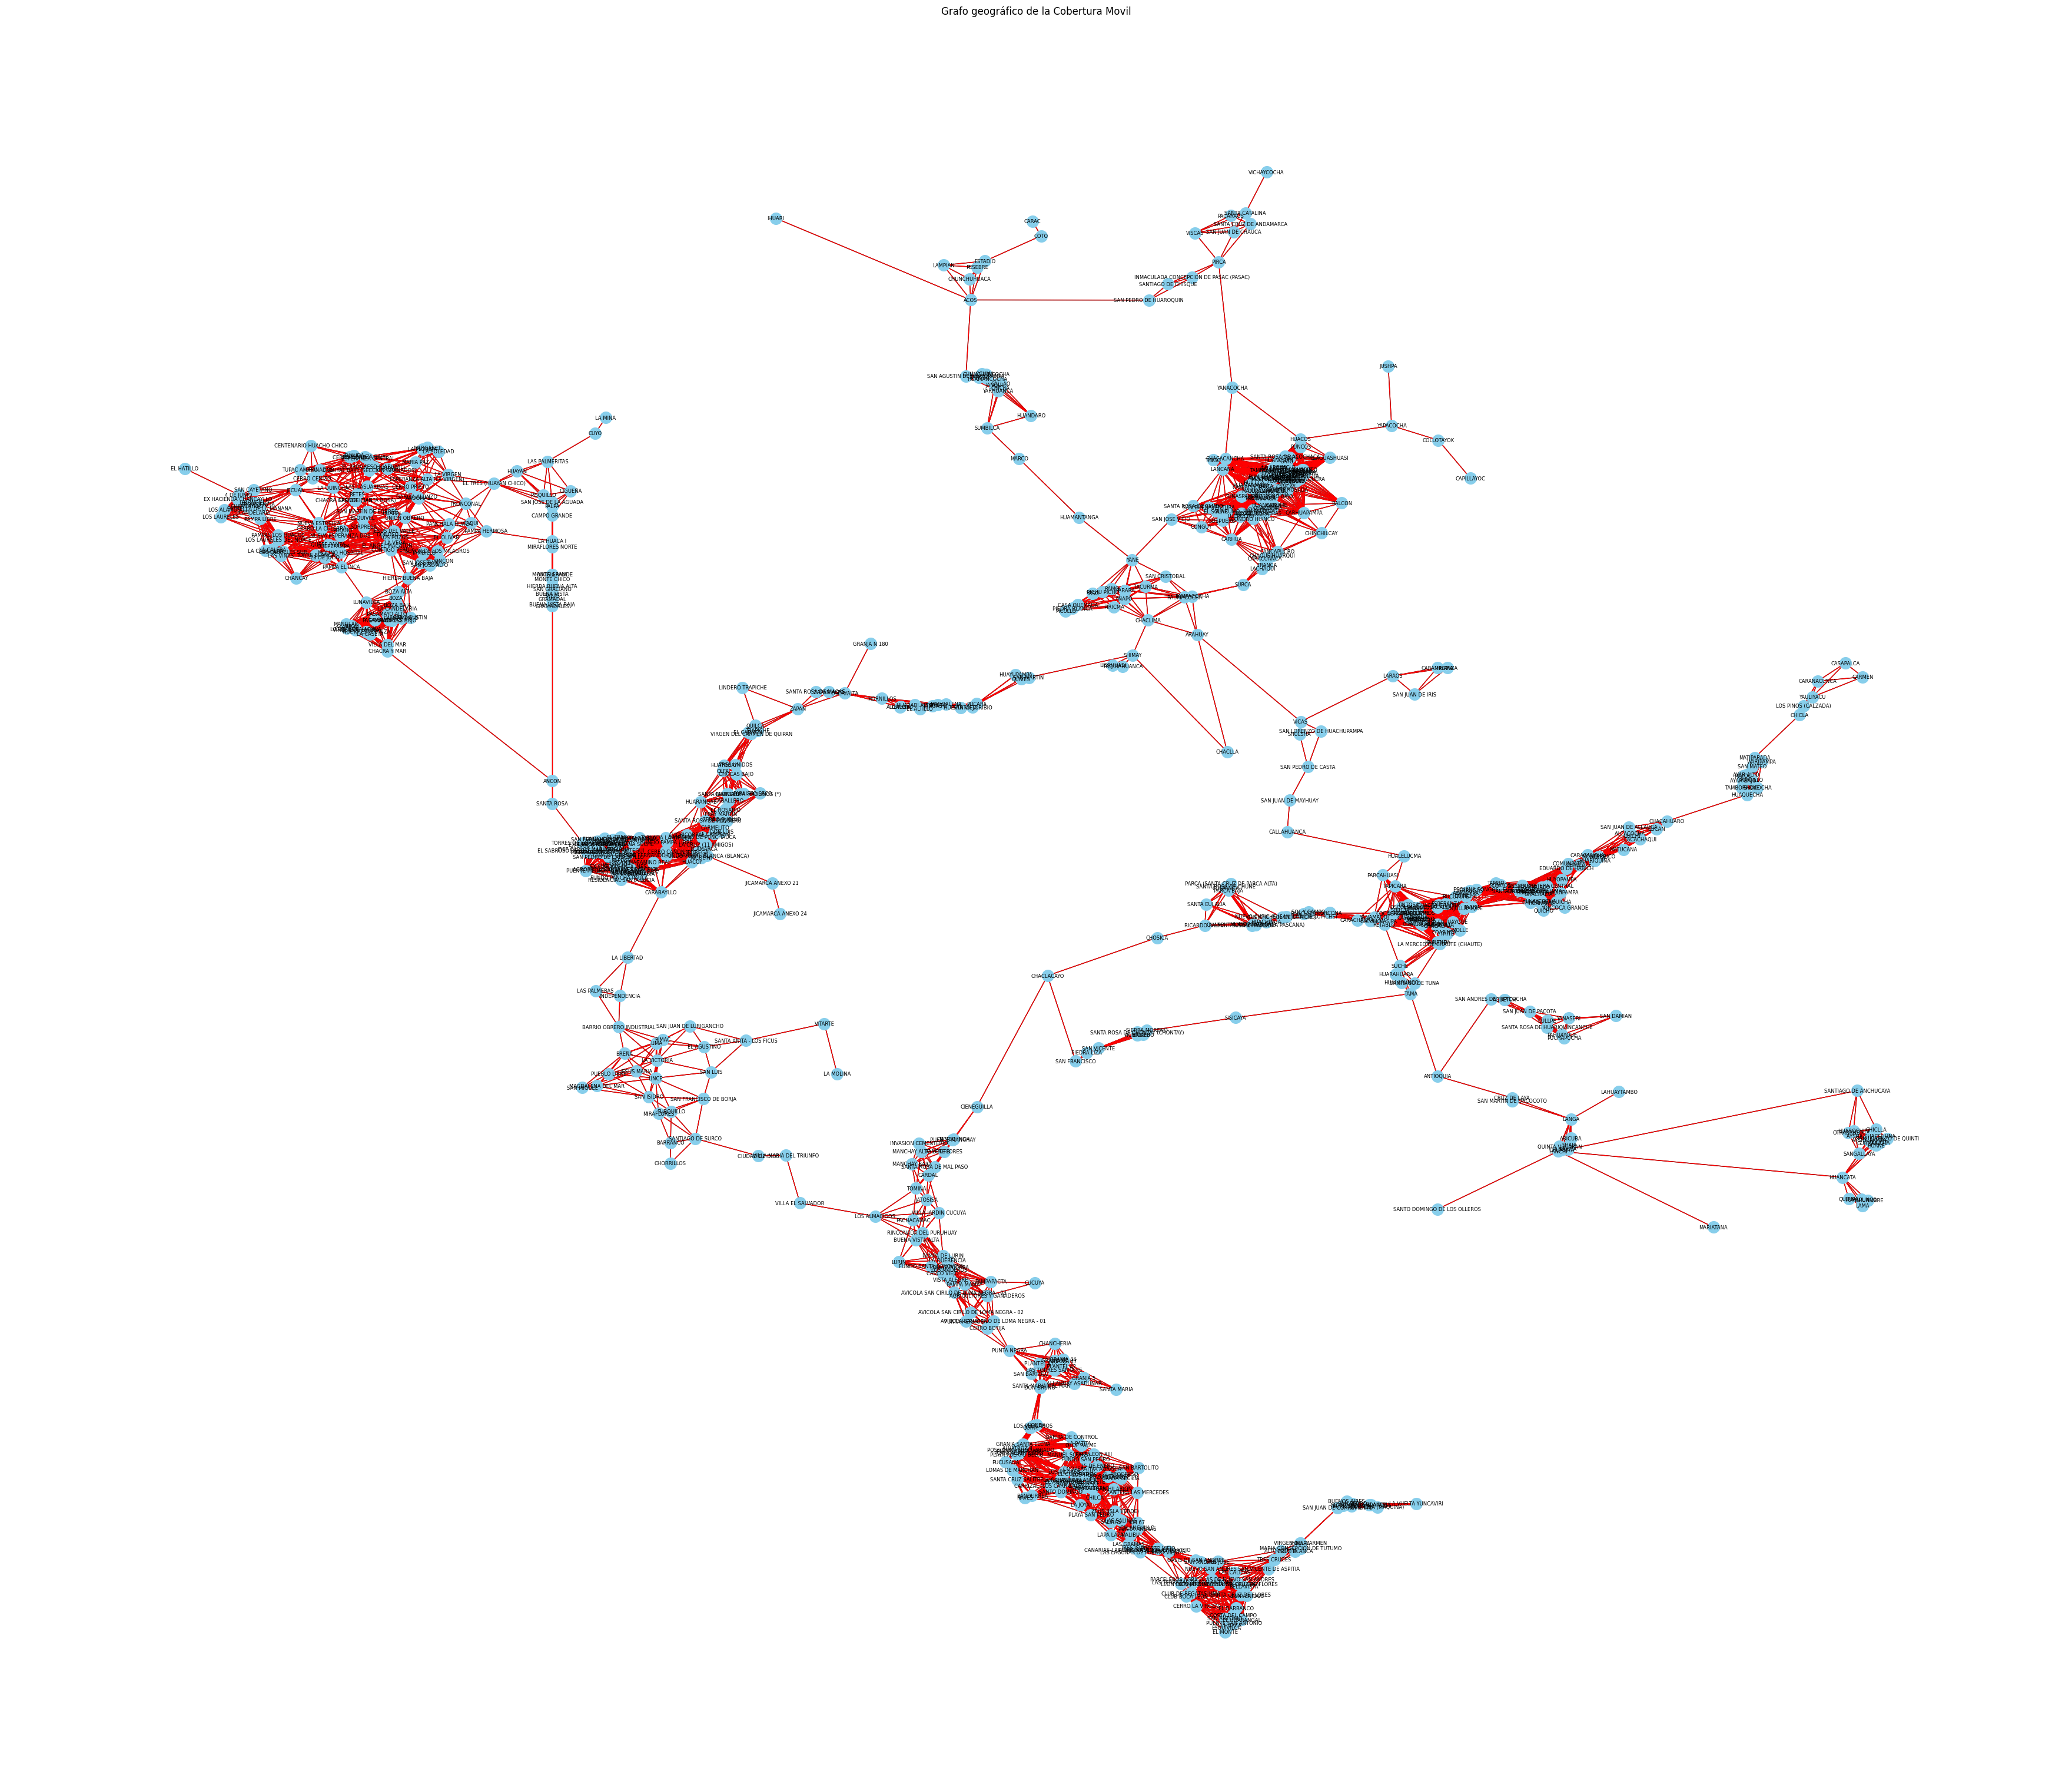

In [22]:
# Crear figura de 13 x 8 pulgadas
pt.figure(figsize=(35, 30))

# Dibujar el grafo 'G' usando las posiciones
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=6)

# Dibujar las aristas del grafo
nx.draw_networkx_edges(G, pos, edge_color='red')

# Título del grafico
pt.title('Grafo geográfico de la Cobertura Movil')